In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# World Happiness Report

## Variáveis
- GDP - Gross Domestic Product (o valor de todos os bens e servicos um pais
produz no ano)  
**The extent to which GDP contributes to the calculation of the Happiness Score.**
- Social Support - Sim ou não (Pergunta: Se estivesse em problemas, você tem
amigos ou família nos quais você pode contar) e fazem uma média
- Health Expectancy - Calculado pela WHO (pesquisar)
- Freedom to make choices - Sim ou Não
- Generosity - Sim ou Não (Pergunta: Você doou dinheiro no ultimo ano
- Corrupção - Sim ou Não - Duas perguntas (Tem corrupção no governo. Tem
corrupção nas empresas)
- Score - Somatória das variáveis

## Objetivos

- Fazer uma análise exploratória de dados através dos anos 2015 até 2019.
- Para responder as perguntas:
    - Quais foram as alterações ano a ano no ranking dos primeiros 10 países.
    - Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a
    ano.(Sem contar o score ou ranking)
    - Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GPD.
    - Qual foi o país que mais subiu no ranking no período inteiro analisado.
    - Teve países que saíram ou entraram do index.
    - Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa.
    - 2 questões extras que vocês acham interessante analisar

In [2]:
dfs = {
    "2015": pd.read_csv("./letscode-projeto-3/"+"dados/2015.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2016": pd.read_csv("./letscode-projeto-3/"+"dados/2016.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2017": pd.read_csv("./letscode-projeto-3/"+"dados/2017.csv", index_col="Country", usecols=["Country", "Happiness.Rank", "Happiness.Score", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption."]),
    "2018": pd.read_csv("./letscode-projeto-3/"+"dados/2018.csv", index_col="Country or region", usecols=["Country or region","Overall rank","Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]),
    "2019": pd.read_csv("./letscode-projeto-3/"+"dados/2019.csv", index_col="Country or region", usecols=["Country or region","Overall rank", 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Generosity'])
}

In [3]:
renames = {
    'Northern Cyprus': 'North Cyprus',
    'Hong Kong': 'Hong Kong S.A.R., China',
    'Somaliland region': 'Somaliland Region',
    'Taiwan': 'Taiwan Province of China',
    'Trinidad and Tobago': 'Trinidad & Tobago',
    'North Macedonia': 'Macedonia',
}
for year in range(2015, 2020):
    dfs[str(year)] = dfs[str(year)].rename(index=renames)

In [4]:
# Renaming Columns
dfs["2015"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2016"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2017"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2018"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']
dfs["2019"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

In [5]:
dfs["2015"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.1+ KB


In [6]:
dfs["2016"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 157 non-null    int64  
 1   Happiness Score                157 non-null    float64
 2   Economy (GDP per Capita)       157 non-null    float64
 3   Family                         157 non-null    float64
 4   Health (Life Expectancy)       157 non-null    float64
 5   Freedom                        157 non-null    float64
 6   Trust (Government Corruption)  157 non-null    float64
 7   Generosity                     157 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.0+ KB


In [7]:
dfs["2017"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 155 non-null    int64  
 1   Happiness Score                155 non-null    float64
 2   Economy (GDP per Capita)       155 non-null    float64
 3   Family                         155 non-null    float64
 4   Health (Life Expectancy)       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Trust (Government Corruption)  155 non-null    float64
 7   Generosity                     155 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 10.9+ KB


In [8]:
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.0+ KB


In [9]:
list_trusts = [dfs["2017"]["Trust (Government Corruption)"], dfs["2019"]["Trust (Government Corruption)"]]
df_trusts = pd.concat(list_trusts, axis=1)
# df_trusts["mean"] = df_trusts.mean(axis=1)
# df_trusts
mean_trust_2017_2019 = df_trusts.loc["United Arab Emirates"].mean()
dfs["2018"].loc["United Arab Emirates", "Trust (Government Corruption)"] = mean_trust_2017_2019
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 15.0+ KB


In [10]:
dfs["2019"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to South Sudan
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 15.0+ KB


In [11]:
ranks = [
    dfs["2015"]["Happiness Rank"].nsmallest(10),
    dfs["2016"]["Happiness Rank"].nsmallest(10),
    dfs["2017"]["Happiness Rank"].nsmallest(10),
    dfs["2018"]["Happiness Rank"].nsmallest(10),
    dfs["2019"]["Happiness Rank"].nsmallest(10),
]
df_ranks = pd.concat(ranks, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]
df_ranks

,2015,2016,2017,2018,2019
Switzerland,1.0,2.0,4.0,5.0,6.0
Iceland,2.0,3.0,3.0,4.0,4.0
Denmark,3.0,1.0,2.0,3.0,2.0
Norway,4.0,4.0,1.0,2.0,3.0
Canada,5.0,6.0,7.0,7.0,9.0
Finland,6.0,5.0,5.0,1.0,1.0
Netherlands,7.0,7.0,6.0,6.0,5.0
Sweden,8.0,10.0,9.0,9.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0
Australia,10.0,9.0,10.0,10.0,NaN


<AxesSubplot:>

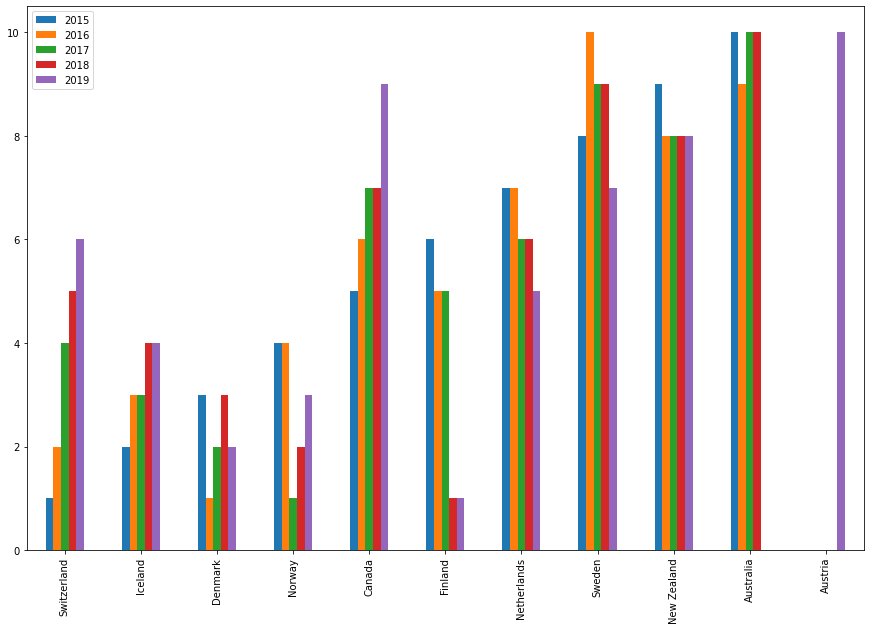

In [12]:
# fig, ax = plt.subplots(figsize=(15, 10))
# for (index, values) in df_ranks.iterrows():
#     ax.plot(values.index, values, label=index)
# ax.legend()
# ax.invert_yaxis()

# plt.show()
df_ranks.plot(kind="bar", figsize=(15, 10))

Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a ano. (Sem contar o score ou ranking)

GDP, Social Support, Health Expectancy, Freedom, Generosity, Corrupção, Score

•	GDP - Gross Domestic Product (o valor de todos os bens e serviços que um país produz no ano)

•	Social Support - Sim ou não (Pergunta: Se estivesse em problemas, você tem amigos ou família nos quais você pode contar) e fazem uma média (1 e 0)

•	Health Expectancy - Calculado pela WHO (pesquisar)

•	Freedom to make choices - Sim ou Não

•	Generosity - Sim ou Não (Pergunta: Você doou dinheiro no último ano)

•	Corrupção - Sim ou Não - Duas perguntas (Tem corrupção no governo. Tem corrupção nas empresas) *ver se é média
•	Score - Somatória das variáveis 


In [13]:
means = []
for year in dfs:
    means.append(dfs[year].describe().loc["mean"])

df_means = pd.concat(means, axis=1)
df_means.columns = ["2015", "2016", "2017", "2018", "2019"]
df_means_describe = df_means.T.describe().T
df_means_describe["delta"] = df_means_describe["max"] - df_means_describe["min"]
df_means_describe.sort_values("delta", ascending=False, inplace=True)
df_means_describe.drop(["Happiness Rank", "Happiness Score"], inplace=True)
df_means_describe.iloc[:3]

,count,mean,std,min,25%,50%,75%,max,delta
Family,5.0,1.079123,0.184476,0.793621,0.991046,1.188898,1.208814,1.213237,0.419616
Health (Life Expectancy),5.0,0.612362,0.070726,0.551341,0.557619,0.597346,0.630259,0.725244,0.173903
Economy (GDP per Capita),5.0,0.916266,0.054217,0.846137,0.891449,0.905147,0.953880,0.984718,0.138581


- Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GDP.


In [14]:
gdps = [
    dfs["2015"]["Economy (GDP per Capita)"],
    dfs["2016"]["Economy (GDP per Capita)"],
    dfs["2017"]["Economy (GDP per Capita)"],
    dfs["2018"]["Economy (GDP per Capita)"],
    dfs["2019"]["Economy (GDP per Capita)"],
]
df_gdps = pd.concat(gdps, axis=1)
df_gdps.columns = ["2015", "2016", "2017", "2018", "2019"]
df_gdps.replace(0, np.nan, inplace=True)
df_gdps["2015 a 2016 (%)"] = (df_gdps["2016"]/df_gdps["2015"] - 1)*100
df_gdps["2016 a 2017 (%)"] = (df_gdps["2017"]/df_gdps["2016"] - 1)*100
df_gdps["2017 a 2018 (%)"] = (df_gdps["2018"]/df_gdps["2017"] - 1)*100
df_gdps["2018 a 2019 (%)"] = (df_gdps["2019"]/df_gdps["2018"] - 1)*100
df_gdps = df_gdps.reset_index()
df_gdps = pd.melt(df_gdps,  id_vars=['index'], value_vars=['2015 a 2016 (%)', '2016 a 2017 (%)','2017 a 2018 (%)','2018 a 2019 (%)'])
df_gdps.columns = ["Country", "Year", "Delta GDP (%)"]
display(df_gdps.nlargest(3, 'Delta GDP (%)'))
display(df_gdps.nsmallest(3, 'Delta GDP (%)'))

,Country,Year,Delta GDP (%)
130,Malawi,2015 a 2016 (%),442.955112
156,Burundi,2015 a 2016 (%),346.470588
294,Malawi,2016 a 2017 (%),168.046892


,Country,Year,Delta GDP (%)
648,Burundi,2018 a 2019 (%),-49.450549
443,Liberia,2017 a 2018 (%),-36.156876
627,Yemen,2018 a 2019 (%),-35.067873


- Qual foi o país que mais subiu no ranking no período inteiro analisado.


In [15]:
rankings = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(rankings, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]
df_ranks.dropna(inplace=True)
df_ranks["Delta"] = df_ranks["2015"] - df_ranks["2019"]
df_ranks.sort_values(by="Delta", ascending=False, inplace=True)
df_ranks.head()

,2015,2016,2017,2018,2019,Delta
Benin,155.0,153.0,143.0,136.0,102.0,53.0
Ivory Coast,151.0,139.0,128.0,107.0,99.0,52.0
Honduras,105.0,104.0,91.0,72.0,59.0,46.0
Hungary,104.0,91.0,75.0,69.0,62.0,42.0
Gabon,143.0,134.0,118.0,103.0,104.0,39.0


- Teve países que saíram ou entraram do index.


In [16]:
rankings = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(rankings, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]
df_entraram_sairam = df_ranks[df_ranks.isna().any(axis=1)]
print(f"{len(df_entraram_sairam)} countries entered and left the rankings")
df_entraram_sairam

18 countries entered and left the rankings


,2015,2016,2017,2018,2019
Oman,22.0,NaN,NaN,NaN,NaN
Suriname,40.0,40.0,NaN,NaN,NaN
Somaliland Region,91.0,97.0,NaN,NaN,NaN
Mozambique,94.0,NaN,113.0,123.0,123.0
Lesotho,97.0,NaN,139.0,141.0,144.0
Laos,99.0,102.0,NaN,110.0,105.0
Swaziland,101.0,NaN,NaN,NaN,135.0
Sudan,118.0,133.0,130.0,137.0,NaN
Djibouti,126.0,NaN,NaN,NaN,NaN
Angola,137.0,141.0,140.0,142.0,NaN


- Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa.


In [17]:
healths = [
    dfs["2015"]["Health (Life Expectancy)"],
    dfs["2016"]["Health (Life Expectancy)"],
    dfs["2017"]["Health (Life Expectancy)"],
    dfs["2018"]["Health (Life Expectancy)"],
    dfs["2019"]["Health (Life Expectancy)"],
]
df_health = pd.concat(gdps, axis=1)
df_health.columns = ["2015", "2016", "2017", "2018", "2019"]
df_health.replace(0, np.nan, inplace=True)
df_health["2015 a 2016 (%)"] = (df_health["2016"]/df_health["2015"] - 1)*100
df_health["2016 a 2017 (%)"] = (df_health["2017"]/df_health["2016"] - 1)*100
df_health["2017 a 2018 (%)"] = (df_health["2018"]/df_health["2017"] - 1)*100
df_health["2018 a 2019 (%)"] = (df_health["2019"]/df_health["2018"] - 1)*100
df_health = df_health.reset_index()
df_health = pd.melt(df_health,  id_vars=['index'], value_vars=['2015 a 2016 (%)', '2016 a 2017 (%)','2017 a 2018 (%)','2018 a 2019 (%)'])
df_health.columns = ["Country", "Year", "Health (%)"]
display(df_health.nlargest(3, 'Health (%)'))
display(df_health.nsmallest(3, 'Health (%)'))

,Country,Year,Health (%)
130,Malawi,2015 a 2016 (%),442.955112
156,Burundi,2015 a 2016 (%),346.470588
294,Malawi,2016 a 2017 (%),168.046892


,Country,Year,Health (%)
648,Burundi,2018 a 2019 (%),-49.450549
443,Liberia,2017 a 2018 (%),-36.156876
627,Yemen,2018 a 2019 (%),-35.067873


- 2 questões extras que vocês acham interessante analisar

<AxesSubplot:>

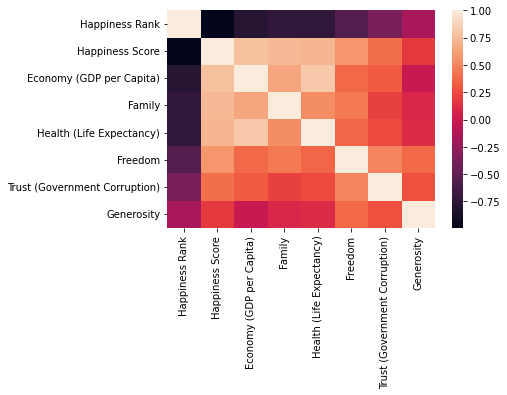

In [18]:
import seaborn as sns
corr = dfs["2015"].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [19]:
import sys

locate_python = sys.exec_prefix

print(locate_python)

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1520.0_x64__qbz5n2kfra8p0


- pip install wheel
- pip install pipwin

- (pipwin install numpy)
- (pipwin install pandas)
- pipwin install shapely
- pipwin install gdal
- pipwin install fiona
- [baixar whl deste link](https://www.lfd.uci.edu/~gohlke/pythonlibs/)
- python3 -m pip install "C:\Users\minoru\Downloads\GDAL-3.4.3-cp310-cp310-win_amd64.whl"
- python3 -m pip install C:\Users\minoru\Downloads\Fiona-1.8.21-cp310-cp310-win_amd64.whl

- pipwin install pyproj
- pipwin install six

- pipwin install rtree
- python3 -m pip install geopandas

Referências
* https://stackoverflow.com/questions/54734667/error-installing-geopandas-a-gdal-api-version-must-be-specified-in-anaconda
* https://stackoverflow.com/questions/44951456/pip-error-microsoft-visual-c-14-0-is-required
* https://stackoverflow.com/questions/50080459/failed-installing-pycrypto-with-pip
* https://opensourceoptions.com/blog/how-to-install-gdal-for-python-with-pip-on-windows/
* https://stackoverflow.com/questions/55583234/installation-fails-for-fiona-and-geopandas-with-gdal-on-python-3-6-on-microsoft


In [20]:
import geopandas

In [21]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [22]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

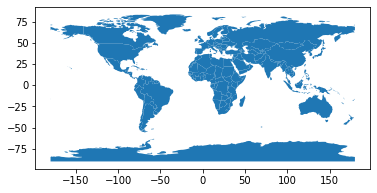

In [23]:
world.plot()

<AxesSubplot:>

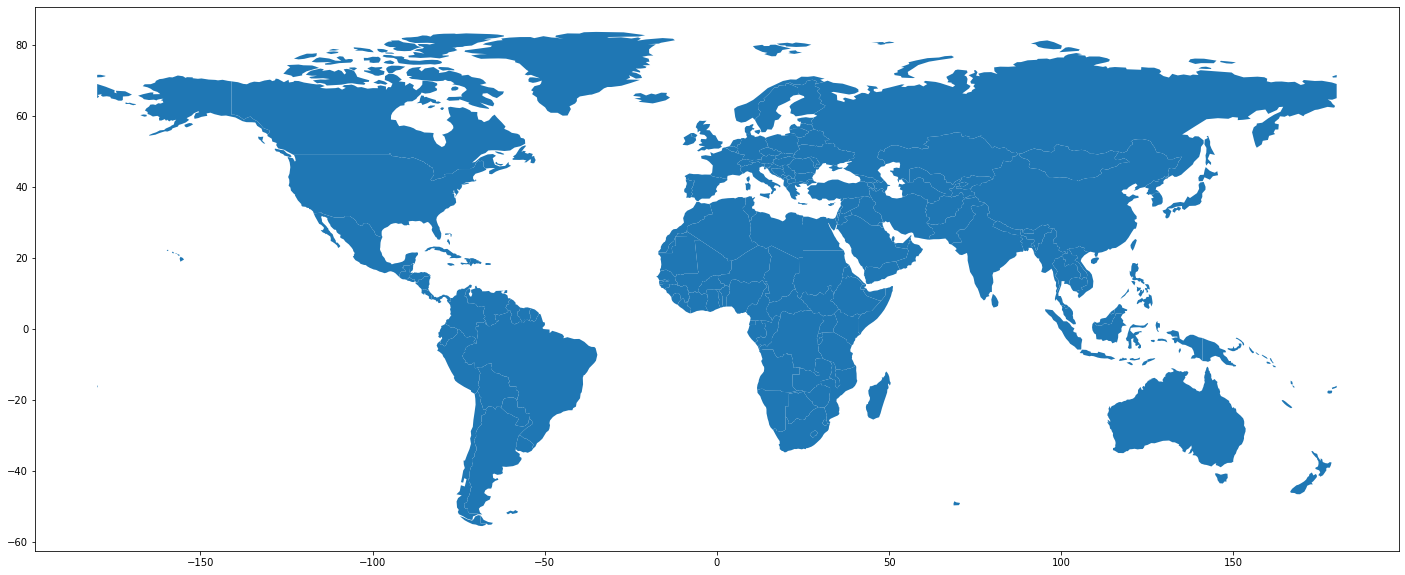

In [24]:
world = world[world.name!="Antarctica"]
world.plot(figsize=(40,10))

In [25]:
all_country_rank = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(all_country_rank, axis=1).reset_index()
df_ranks.columns = ["name", "2015", "2016", "2017", "2018", "2019"]
df_ranks

,name,2015,2016,2017,2018,2019
0,Switzerland,1.0,2.0,4.0,5.0,6.0
1,Iceland,2.0,3.0,3.0,4.0,4.0
2,Denmark,3.0,1.0,2.0,3.0,2.0
3,Norway,4.0,4.0,1.0,2.0,3.0
4,Canada,5.0,6.0,7.0,7.0,9.0
...,...,...,...,...,...,...
159,Belize,NaN,52.0,50.0,49.0,NaN
160,Somalia,NaN,76.0,93.0,98.0,112.0
161,Namibia,NaN,113.0,111.0,119.0,113.0
162,South Sudan,NaN,143.0,147.0,154.0,156.0


In [26]:
# tratar nomencaturas de países
merge_names = world.merge(df_ranks, how='right')
merge_names.name[merge_names.isna().any(axis=1)]
merge_names = world.merge(df_ranks, how='outer')
merge_names.name[merge_names.isna().any(axis=1)].reset_index()


,index,name
0,0,Fiji
1,2,W. Sahara
2,4,United States of America
3,7,Papua New Guinea
4,11,Dem. Rep. Congo
...,...,...
64,193,Congo (Brazzaville)
65,194,Comoros
66,195,Central African Republic
67,196,Ivory Coast


In [27]:
ren_world = {"Bosnia and Herzegovina": "Bosnia and Herz.",
            "Central African Republic": "Central African Rep.",
            "Congo (Brazzaville)": "Congo",
            "Congo (Kinshasa)": "Dem. Rep. Congo",
            "Czech Republic": "Czechia",
            "Dominican Republic": "Dominican Rep.",
            "Macedonia": "North Macedonia",
            "Palestinian Territories": "Palestine",
            "Somaliland Region": "Somaliland",
            "South Sudan": "S. Sudan",
            "Taiwan Province of China": "Taiwan",
            "Trinidad & Tobago": "Trinidad and Tobago",
            "United States": "United States of America"}

df_ranks = df_ranks.replace({"name": ren_world})

<AxesSubplot:title={'center':'World | Ranking of Happiness | 2019'}>

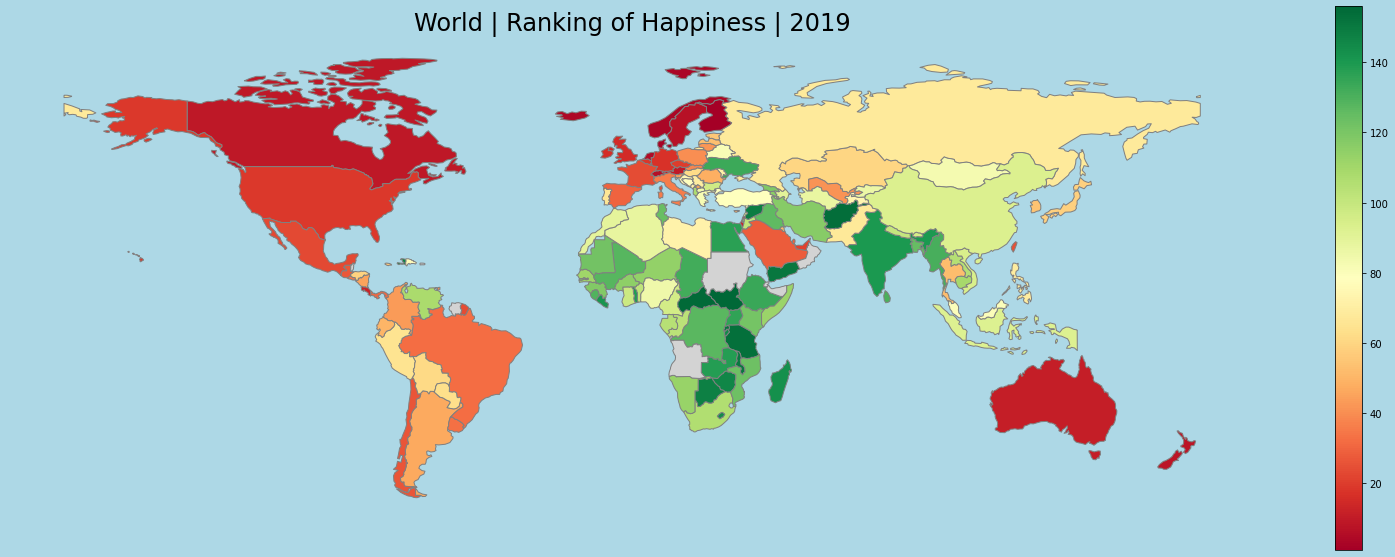

In [307]:
world_rank = world.merge(df_ranks)

fig, ax = plt.subplots(1, figsize=(28,10), facecolor='lightblue')
ax.axis('off')
ax.title.set_text(f"World | Ranking of Happiness | {year}")
ax.title.set_fontsize(24)

world_rank.plot(column='2019',
                ax=ax,
                legend='reverse',
                cmap='RdYlGn',
                facecolor='lightblue',
                edgecolors='grey',
                missing_kwds={'color': 'lightgrey'})


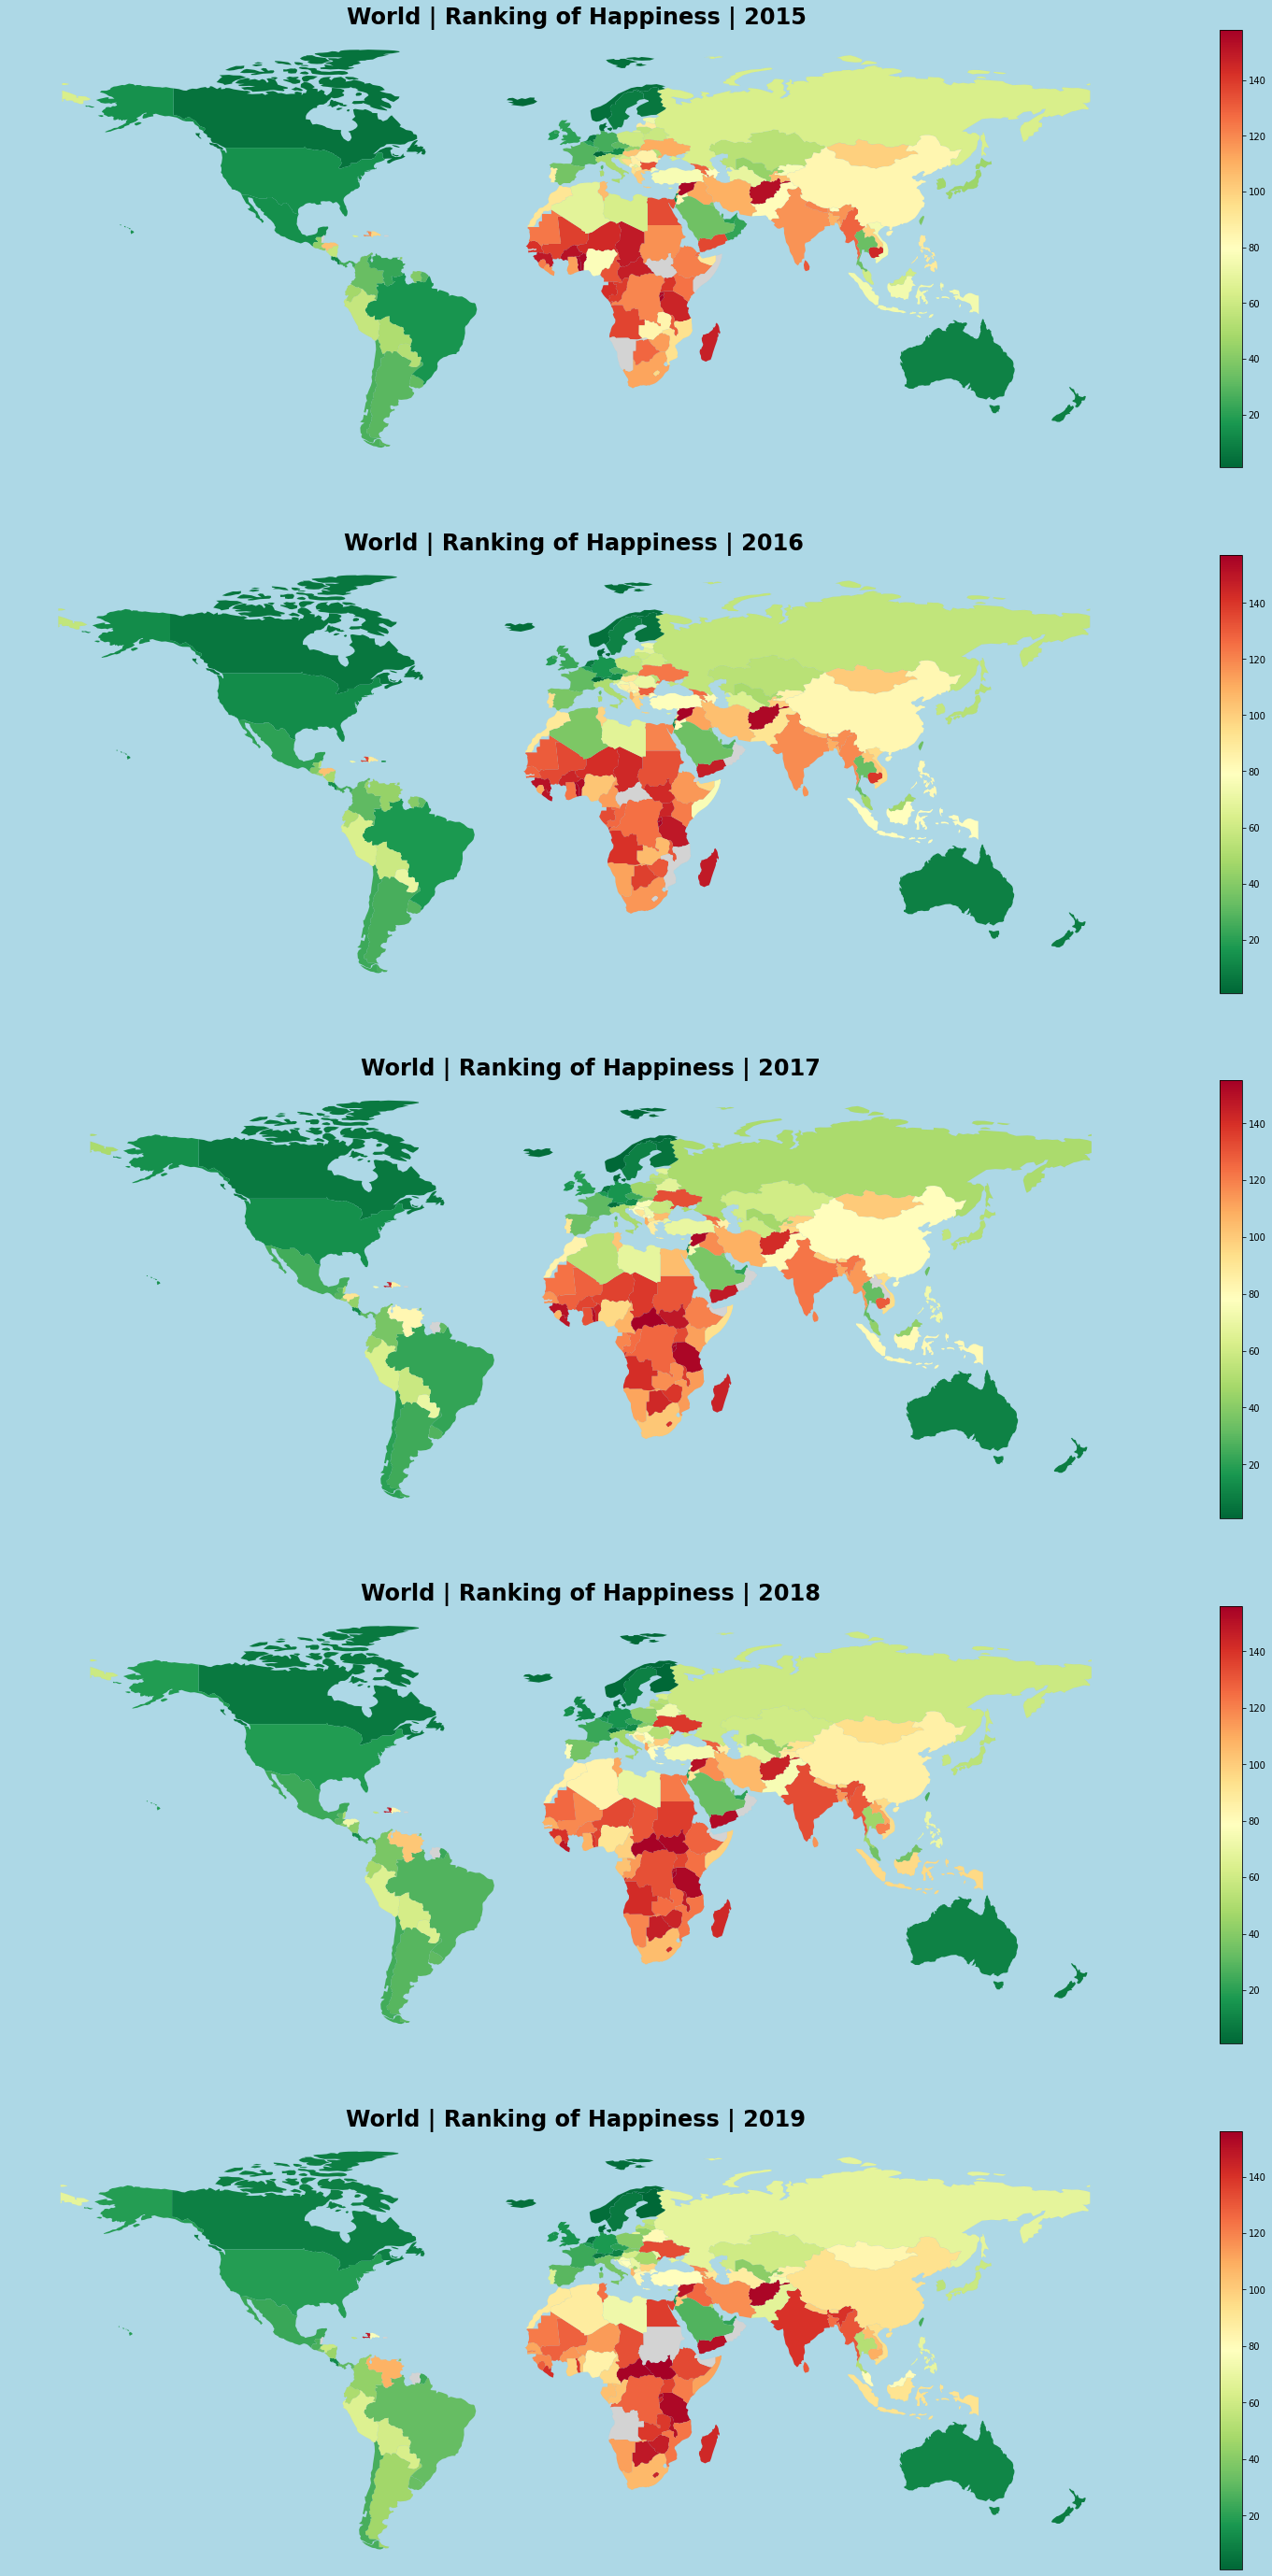

In [315]:
world_rank = world.merge(df_ranks)

fig, axes = plt.subplots(5, figsize=(30,50), facecolor='lightblue')
i=0

for year in range(2015,2020):
    ax = axes[i]
    ax.title.set_text(f"World | Ranking of Happiness | {year}")
    ax.title.set_fontsize(24)
    ax.title.set_weight('bold')
    ax.axis("off")

    world_rank.plot(column=str(year),
        ax=ax,
        legend='reverse',
        cmap='RdYlGn_r',
        facecolor='lightblue',
        edgecolors='grey',
        linewidth = 0.01,
        missing_kwds={'color': 'lightgrey'})
    i = i+1
plt.savefig(f'World.png', dpi=300, format='png')

In [259]:
world = world[world.name!="Antarctica"]


<AxesSubplot:>

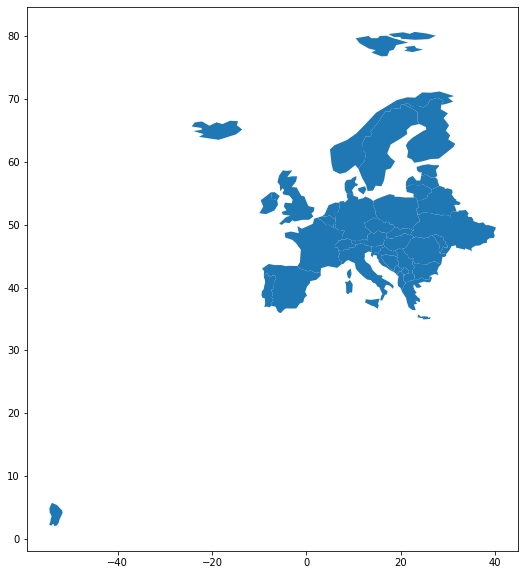

In [260]:
europe = world[(world.continent=="Europe") & (world.name!="Russia")]
europe.plot(figsize=(10, 10))

In [262]:
france = europe_rank[europe_rank.name == 'France']
slice_france = france.geometry.iloc[0][1:2]
europe_rank.loc[europe_rank.name == 'France', 'geometry'] = slice_france

C:\Users\minoru\AppData\Local\Temp\ipykernel_29840\2958376010.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  slice_france = france.geometry.iloc[0][1:2]
C:\Users\minoru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3199: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  return asarray(a).ndim
C:\Users\minoru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3199: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shap

In [263]:
norway = europe_rank[europe_rank.name == 'Norway']
slice_norway = norway.geometry.iloc[0][1:2]
europe_rank.loc[europe_rank.name == 'Norway', 'geometry'] = slice_norway


C:\Users\minoru\AppData\Local\Temp\ipykernel_29840\4116432080.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  slice_norway = norway.geometry.iloc[0][1:2]
C:\Users\minoru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3199: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  return asarray(a).ndim
C:\Users\minoru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3199: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shap

In [261]:
europe_rank = europe.merge(df_ranks)

<AxesSubplot:>

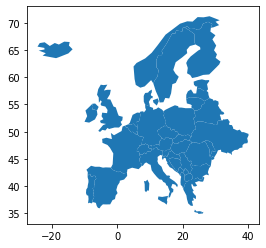

In [265]:
europe_rank.plot()

In [218]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)'], dtype=object)

<AxesSubplot:>

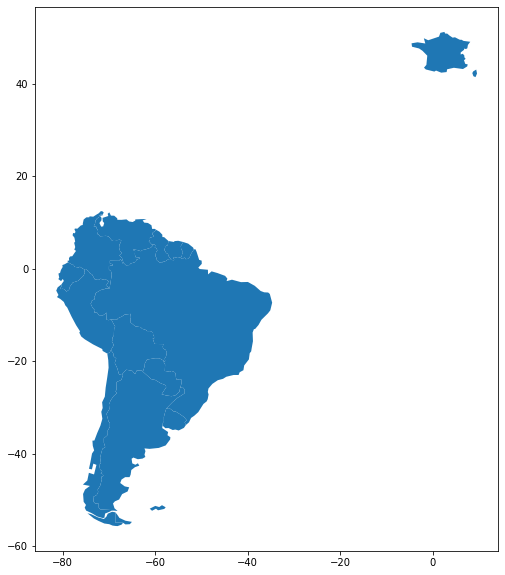

In [277]:
samerica = world[(world.continent=='South America')|(world.name=='France')]
samerica.plot(figsize=(10, 10))

<AxesSubplot:>

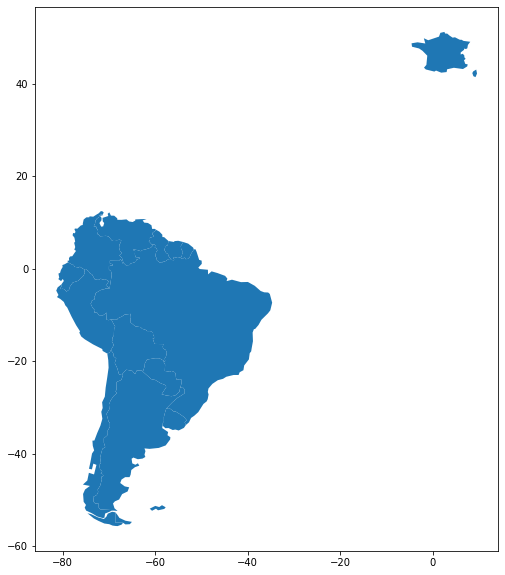

In [278]:
samerica_rank = samerica.merge(df_ranks, how='left')
samerica_rank.plot(figsize=(10,10))

In [ ]:
france = world[world.name == 'France']

france = samerica_rank[samerica_rank.name == 'France']
guiana_f = france.geometry.iloc[0][0]
samerica_rank.loc[samerica_rank.name == 'France', 'geometry'] = guiana_f

# french_guiana = {'pop_est': np.nan,
#                 'continent': 'South America',
#                 'name': 'Guiana',
#                 'iso_a3': None,
#                 'gdp_md_est': np.nan,
#                 '2015': np.nan,
#                 '2016': np.nan,
#                 '2017': np.nan,
#                 '2018': np.nan,
#                 '2019': np.nan}
# french_g_df = pd.DataFrame(french_guiana)
# french_g_df

In [283]:
samerica_rank.loc[samerica_rank.name == 'France', 'name'] = "French Guiana"

In [285]:
french_guiana = {'pop_est': np.nan,
                'continent': 'South America',
                'iso_a3': None,
                'gdp_md_est': np.nan,
                '2015': np.nan,
                '2016': np.nan,
                '2017': np.nan,
                '2018': np.nan,
                '2019': np.nan}

for k, v in french_guiana.items():
    samerica_rank.loc[samerica_rank.name == 'French Guiana', k] = v

samerica_rank

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,2015,2016,2017,2018,2019
0,44938712.0,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",30.0,26.0,24.0,29.0,47.0
1,18952038.0,South America,Chile,CHL,282318.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",27.0,24.0,20.0,25.0,26.0
2,3398.0,South America,Falkland Is.,FLK,282.0,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",NaN,NaN,NaN,NaN,NaN
3,3461734.0,South America,Uruguay,URY,56045.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",32.0,29.0,28.0,31.0,33.0
4,211049527.0,South America,Brazil,BRA,1839758.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",16.0,17.0,22.0,28.0,32.0
5,11513100.0,South America,Bolivia,BOL,40895.0,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...",51.0,59.0,58.0,62.0,61.0
6,32510453.0,South America,Peru,PER,226848.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...",58.0,64.0,63.0,65.0,65.0
7,50339443.0,South America,Colombia,COL,323615.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",33.0,31.0,36.0,37.0,43.0
8,28515829.0,South America,Venezuela,VEN,482359.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...",23.0,44.0,82.0,102.0,108.0
9,782766.0,South America,Guyana,GUY,5173.0,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371...",NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

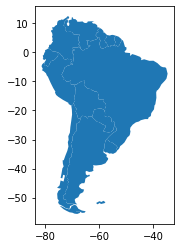

In [286]:
samerica_rank.plot()

In [ ]:
fig, axes = plt.subplots(5, figsize=(30,150), facecolor='lightblue')

i=0
for year in range(2015,2020):
    ax = axes[i]
    ax.title.set_text(f"Europe - Happyness rank year {year}")
    ax.title.set_fontsize(24)
    ax.axis("off")

    europe_rank.plot(column=str(year),
        ax=ax,
        legend='reverse',
        label=True,
        cmap='RdYlGn',
        facecolor='lightblue',
        edgecolors='grey',
        linewidth = 0.01,
        missing_kwds={'color': 'lightgrey'})
    i = i+1

In [148]:
europe_rank.to_csv('europe_rank.csv')

In [160]:
real_france = france.geometry.iloc[0][1:2]
france

C:\Users\minoru\AppData\Local\Temp\ipykernel_29840\2703831557.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  real_france = france.geometry.iloc[0][1:2]


In [ ]:
import matplotlib.pyplot as plt

In [267]:
europe_rank['coords'] = europe_rank['geometry'].apply(lambda x: x.representative_point().coords[:])
europe_rank['coords'] = [coords[0] for coords in europe_rank['coords']]

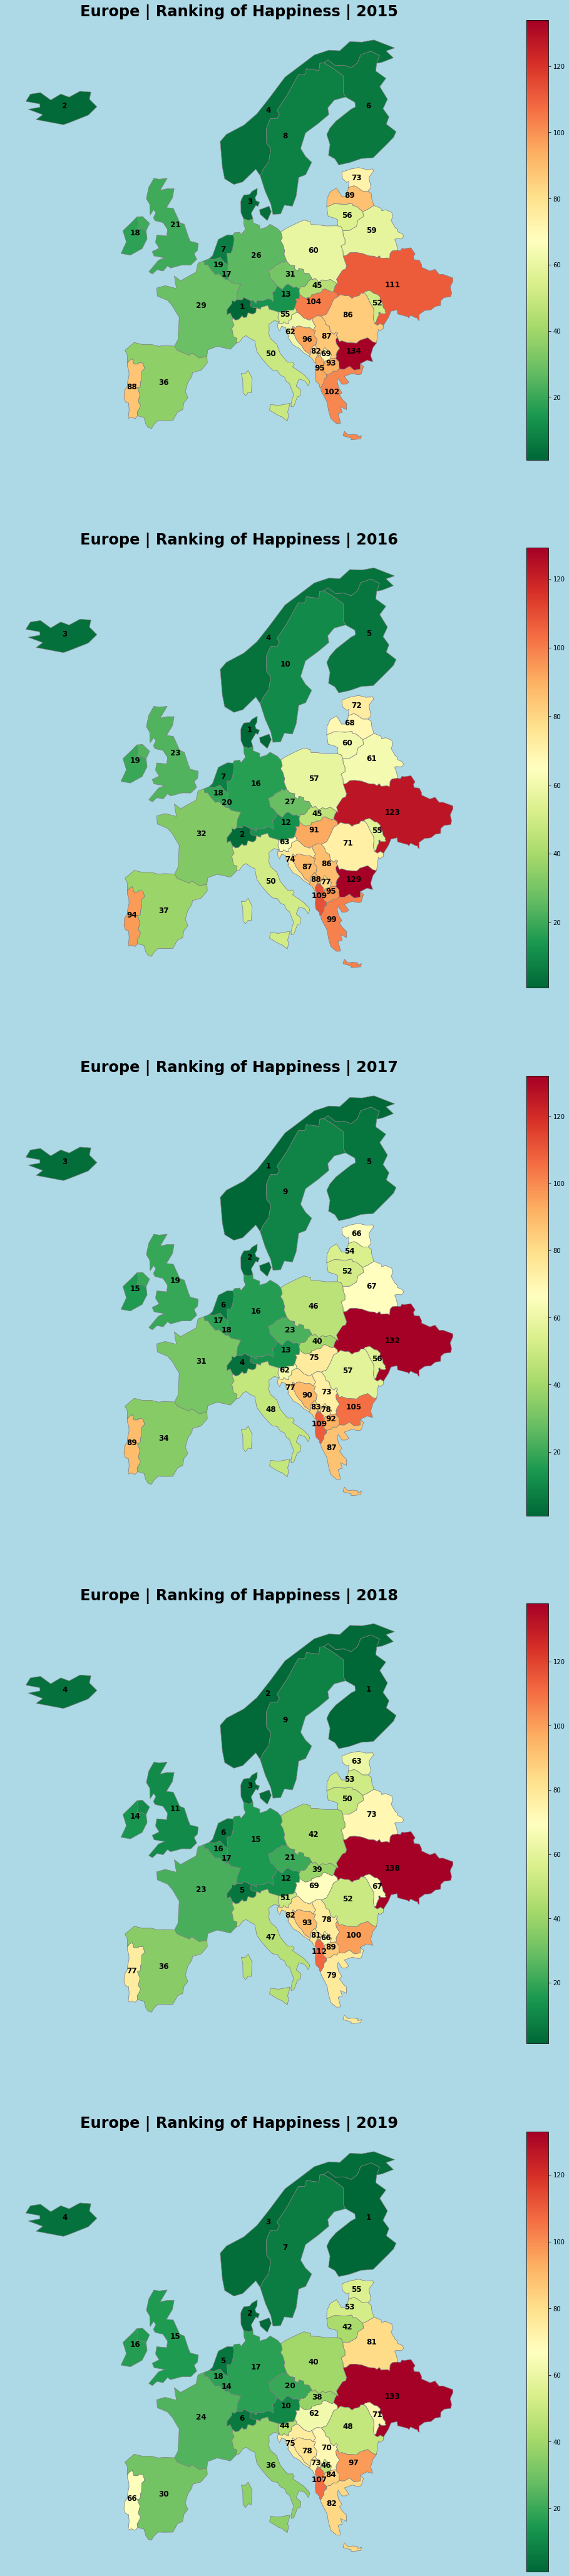

In [314]:
fig, axes = plt.subplots(5, figsize=(30,75), facecolor='lightblue')

i=0
for year in range(2015,2020):
     ax = axes[i]
     ax.title.set_text(f"Europe | Ranking of Happiness | {year}")
     ax.title.set_fontsize(24)
     ax.title.set_weight('bold')
     ax.axis("off")

     europe_rank.plot(column=str(year),
          ax=ax,
          legend=True,
          label=True,
          cmap='RdYlGn_r',
          facecolor='lightblue',
          edgecolors='grey',
          linewidth = 0.75,
          missing_kwds={'color': 'lightgrey'})
     for idx, row in europe_rank.iterrows():
          ax.annotate(int(row[str(year)]), xy=row['coords'], horizontalalignment='center', color='black', weight='semibold', fontsize='12')
          # print(row['2015'],': ',row['name'])
     i+=1

plt.savefig(f'Europe.png', dpi=300, format='png')

In [287]:
samerica_rank['coords'] = samerica_rank['geometry'].apply(lambda x: x.representative_point().coords[:])
samerica_rank['coords'] = [coords[0] for coords in samerica_rank['coords']]

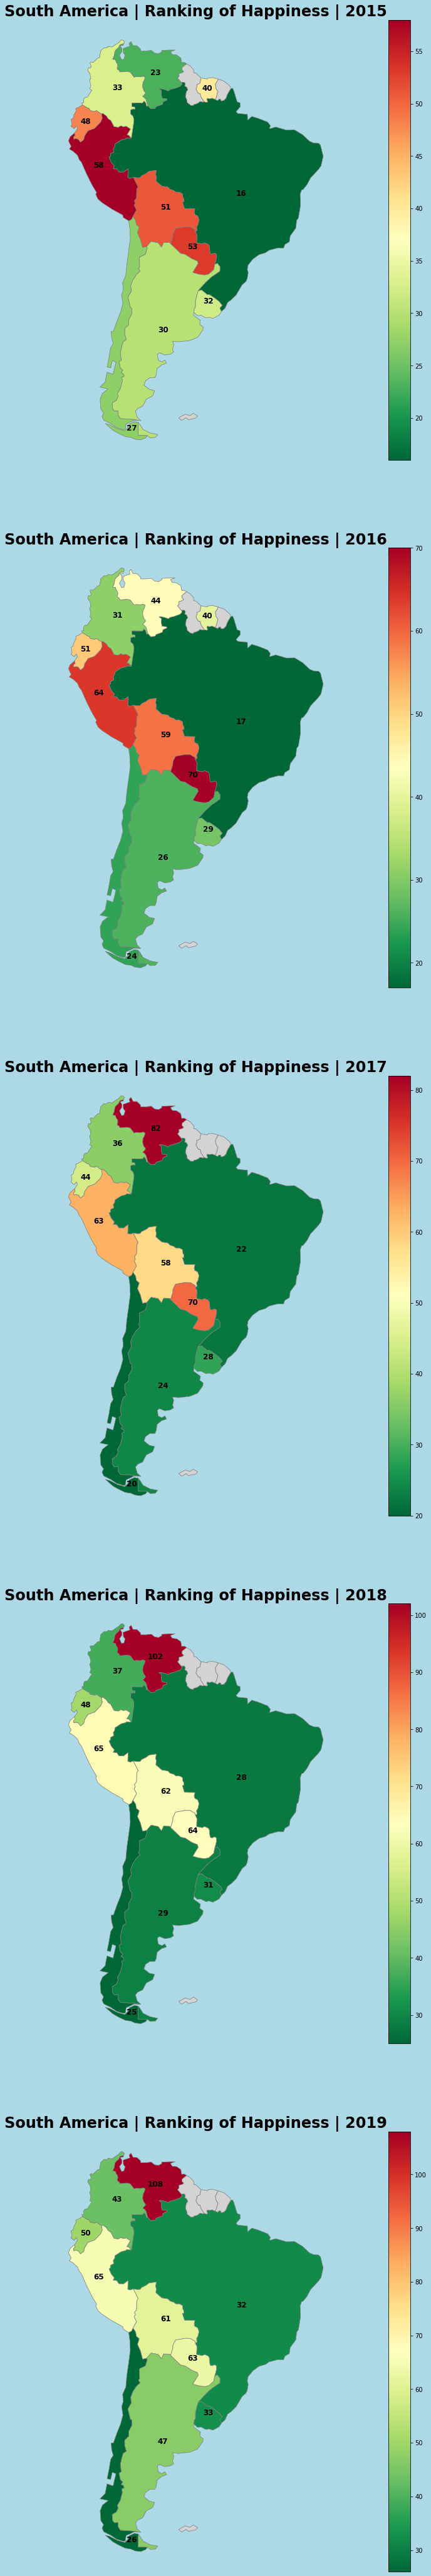

In [313]:
fig, axes = plt.subplots(5, figsize=(30,75), facecolor='lightblue')

i=0
for year in range(2015,2020):
     ax = axes[i]
     ax.title.set_text(f"South America | Ranking of Happiness | {year}")
     ax.title.set_fontsize(24)
     ax.title.set_weight('bold')
     ax.axis("off")

     samerica_rank.plot(column=str(year),
          ax=ax,
          legend=True,
          label=True,
          cmap='RdYlGn_r',
          facecolor='lightblue',
          edgecolors='grey',
          linewidth = 0.75,
          missing_kwds={'color': 'lightgrey'})
     for idx, row in samerica_rank.iterrows():
          ax.annotate(int(row[str(year)]) if row[str(year)]>0 else '', xy=row['coords'], horizontalalignment='center', color='black', weight='semibold', fontsize='12')
     i+=1
plt.savefig(f'SAmerica.png', dpi=300, format='png')
